In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib as mpl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as dates
import datetime
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, plot
%matplotlib inline

In [2]:
start = datetime.datetime(2007, 12, 1)
end = datetime.datetime(2009, 6, 30)
d = data.DataReader("^DJI", 'yahoo', start, end)
d

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-11-30,13466.990234,13281.650391,13314.250000,13371.719727,312570000,13371.719727
2007-12-03,13407.240234,13296.280273,13368.219727,13314.570312,212170000,13314.570312
2007-12-04,13316.280273,13237.589844,13311.240234,13248.730469,204940000,13248.730469
2007-12-05,13460.240234,13244.009766,13244.009766,13444.959961,256800000,13444.959961
2007-12-06,13632.900391,13426.179688,13445.849609,13619.889648,197270000,13619.889648
...,...,...,...,...,...,...
2009-06-24,8428.410156,8259.879883,8323.509766,8299.860352,189430000,8299.860352
2009-06-25,8490.459961,8259.429688,8299.250000,8472.400391,222540000,8472.400391
2009-06-26,8468.769531,8401.360352,8468.540039,8438.389648,307640000,8438.389648


In [3]:
#convert dates to integer value for later use with the 
#matplotlib candlestick charting function (it doesn't accept datetimes)
d['Dates'] = dates.date2num(d.index)

In [4]:
#Tenkan-sen(Conversion Line): ((9-Period high + 9-period low)/2))
nine_period_high = d['High'].rolling(window=9).max()
nine_period_low = d['Low'].rolling(window=9).min()
d['Tenkan_sen'] = (nine_period_high + nine_period_low)/ 2

In [5]:
#Kijun-sen (Base Line): ((26-period high + 26-period low)/2))
period26_high = d['High'].rolling(window=26).max()
period26_low = d['Low'].rolling(window=26).min()
d['Kijun_sen'] = (period26_high + period26_low) / 2

In [6]:
#Senkou Span A (Leading Span A): ((Conversion Line + Base Line)/2))
d['Senkou_span_a'] = ((d['Tenkan_sen'] + d['Kijun_sen']) / 2).shift(26)

In [7]:
#Senkou Span B (Leading Span B): ((52-period high + 52-period low)/2))
period52_high = d['High'].rolling(window=52).max()
period52_low = d['Low'].rolling(window=52).min()
d['Senkou_span_b'] = ((period52_high + period52_low)/2).shift(26)

In [8]:
#The most current closing price plotted 26 time periods behind (optional)
d['Chikou_span'] = d['Close'].shift(-26)

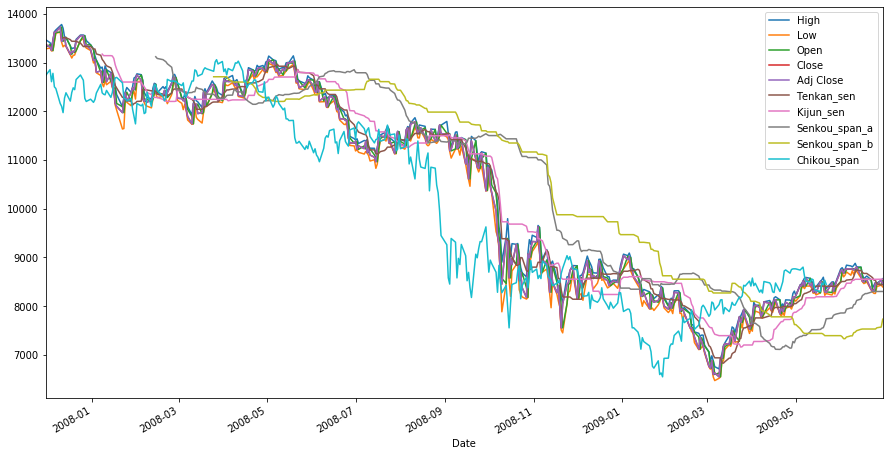

In [9]:
d.drop(['Dates', 'Volume'], axis = 1).plot(figsize=(15,8))
plt.show()

In [10]:
#Re-arrange data so that each row contains values of a day : 'Date','Open','High','Close'.
#The 'Date' can't be a "datetime" object as the function wont accept time. That's why we converted
#our 'Date' column into integer values using the "date2num" function earlier.

quotes = [tuple(x) for x in d[['Dates', 'Open', 'High', 'Low', 'Close']].values]


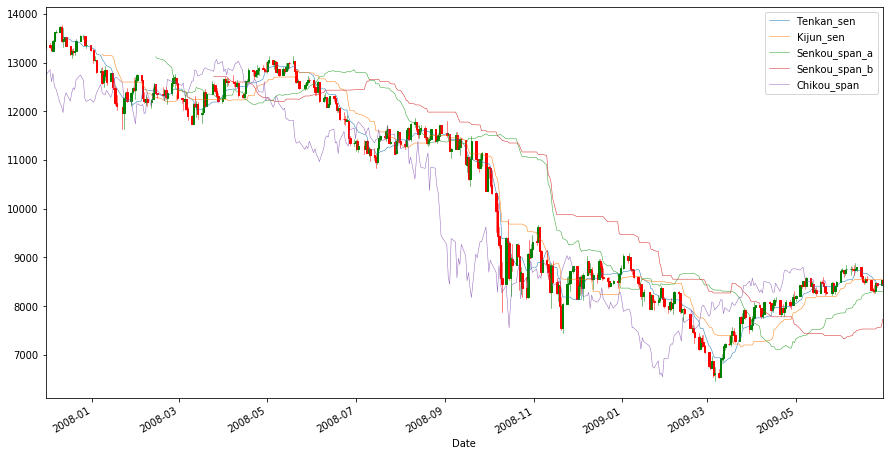

In [11]:
#Plot candlestick, along with ichimoku elements
fig, ax = plt.subplots(figsize=(15,8))
d[['Tenkan_sen', 'Kijun_sen', 'Senkou_span_a', 'Senkou_span_b', 'Chikou_span']].plot(ax=ax, linewidth=0.5)
candlestick_ohlc(ax,quotes, width=1.0, colorup='g', colordown='r');

In [12]:
init_notebook_mode(connected=True)

trace = go.Candlestick(x=d.index,
                      open=d['Open'],
                      high=d['High'],
                      low=d['Low'],
                      close=d['Close'])
data = [trace]
plot(data, filename='simple _candlestick.html')

'simple _candlestick.html'

In [13]:
#Set colours for up and down candles
INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'

In [14]:
#create list to hold dictionary with data for our first series to plot
#(which is the candlestick element itself)
data = [dict (
        type = 'candlestick',
        open = d.Open,
        high = d.High,
        low = d.Low,
        close = d.Close,
        x = d.index,
        yaxis = 'y2',
        name = '^DJI',
        increasing = dict(line = dict(color = INCREASING_COLOR)),
        decreasing = dict(line = dict(color = DECREASING_COLOR)),
)]

In [15]:
#Create empty dictionary for later use to hold settings and layout options
layout=dict()

In [16]:
#Create our main chart "Figure" object which consist of data to plot and layout setting
fig = dict(data=data, layout=layout)

In [17]:
#Assign various setting and choices - background colour, range selector etc
fig['layout']['plot_bgcolor']= 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict(rangeselector = dict(visible = True))
fig['layout']['yaxis'] = dict(domain = [0, 0.2], showticklabels = False)
fig['layout']['yaxis2'] = dict(domain = [0.2, 0.8])
fig['layout']['legend'] = dict(orientation = 'h', y=0.9, x=0.3, yanchor='bottom')
fig['layout']['margin'] = dict(t=40, b=40, r=40, l=40)

In [18]:
#Populate the "rangeselector" object with necessary settings
rangeselector=dict(
    visible = True,
    x = 0, y = 0.9,
    bgcolor = 'rgba(150,200,250,0.4)',
    font = dict(size = 13),
    buttons = list ([
        dict(count=1,
            label='reset',
             step='all'),
        dict(count=1,
            label='1yr',
            step='month',
            stepmode='backward'),
        dict(count=3,
            label='3 mo',
            step='month',
            stepmode='backward'),
        dict(count=1,
            label ='1 mo',
            step='month',
            stepmode='backward'),
        dict(step='all')
    ]))

fig['layout']['xaxis']['rangeselector'] = rangeselector

In [19]:
#Appen the ichimoku elements to the plot
fig['data'].append(dict(x=d['Tenkan_sen'].index, y=d['Tenkan_sen'], type='scatter', mode ='lines',
                        line = dict (width = 1),
                        marker = dict( color = '#33BDFF'),
                        yaxis = 'y2', name ='Tenkan_sen'))
fig['data'].append(dict(x=d['Kijun_sen'].index, y=d['Kijun_sen'], type='scatter', mode = 'lines',
                       line = dict (width = 1),
                       marker = dict(color = '#F1F316'),
                       yaxis ='y2', name = 'Kijun_sen'))
fig['data'].append(dict(x=d['Senkou_span_a'].index, y=d['Senkou_span_a'], type='scatter', mode ='lines',
                       line = dict (width = 1 ),
                       marker = dict ( color = '#228B22'),
                       yaxis = 'y2', name = 'Senkou_span_ a'))
fig['data'].append(dict(x=d['Senkou_span_a'].index, y=d['Senkou_span_b'], type='scatter', mode ='lines',
                       line = dict (width = 1 ), fill = 'tonexty',
                       marker = dict ( color = '#FF3342'),
                       yaxis = 'y2', name = 'Senkou_span_ b'))
fig['data'].append(dict(x=d['Chikou_span'].index, y=d['Chikou_span'], type='scatter', mode ='lines',
                       line = dict (width= 1 ),
                       marker = dict ( color = '#D105F5'),
                       yaxis = 'y2', name = 'Chikou_span'))

In [20]:
#Set colour list for candlestick
colors = []

for i in range(len(d.Close)):
    if i != 0:
        if d.Close[i] > d.Close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)

plot(fig, filename ='candelstick-ichimoku.html')

'candelstick-ichimoku.html'

In [21]:
d.dropna(inplace=True)
d['above_cloud'] = 0
d['above_cloud'] = np.where((d['Low'] > d['Senkou_span_a']) & (d['Low'] > d['Senkou_span_b']), 1, d['above_cloud'])
d['above_cloud'] = np.where((d['High'] > d['Senkou_span_a']) & (d['High'] < d['Senkou_span_b']), -1, d['above_cloud'])
d['A_above_B'] = np.where((d['Senkou_span_a'] > d['Senkou_span_b']), 1, -1)

In [22]:
#Make actual buy and sell entry signal
d['Tenkan_kiju_cross'] = np.NaN
d['Tenkan_kiju_cross'] = np.where((d['Tenkan_sen'].shift(1) <= d['Kijun_sen'].shift(1)) & (d['Tenkan_sen'] > d['Kijun_sen']), 1, d['Tenkan_kiju_cross'])
d['Tenkan_kiju_cross'] = np.where((d['Tenkan_sen'].shift(1) >= d['Kijun_sen'].shift(1)) & (d['Tenkan_sen'] < d['Kijun_sen']), -1, d['Tenkan_kiju_cross'])

d['Price_tenkan_cross'] = np.NaN
d['Price_tenkan_cross'] = np.where((d['Open'].shift(1) <= d['Tenkan_sen'].shift(1)) & (d['Open'] > d['Tenkan_sen']), 1, d['Price_tenkan_cross'])
d['Price_tenkan_cross'] = np.where((d['Open'].shift(1) >= d['Tenkan_sen'].shift(1)) & (d['Open'] < d['Tenkan_sen']), -1, d['Price_tenkan_cross'])

In [23]:
#Making strategy between buy and sell
d['buy'] = np.NaN
d['buy'] = np.where((d['above_cloud'].shift(1) == 1) & (d['A_above_B'].shift(1) == 1) & ((d['Tenkan_kiju_cross'].shift(1) == 1) | (d['Price_tenkan_cross'].shift(1) == 1)), 1, d['buy'])
d['buy'] = np.where(d['Tenkan_kiju_cross'].shift(1) == -1, 0, d['buy'])
d['buy'].ffill(inplace=True)


d['sell'] = np.NaN
d['sell'] = np.where((d['above_cloud'].shift(1) == -1) & (d['A_above_B'].shift(1) == -1) & ((d['Tenkan_kiju_cross'].shift(1) == -1) | (d['Price_tenkan_cross'].shift(1) == -1)), -1, d['sell'])
d['sell'] = np.where(d['Tenkan_kiju_cross'].shift(1) == 1, 0, d['sell'])
d['sell'].ffill(inplace=True)

d['position'] = d['buy'] + d['sell']

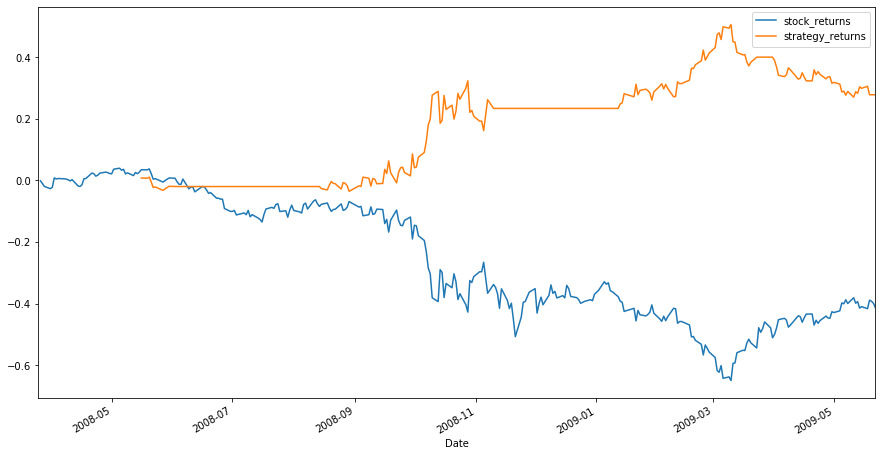

In [24]:
d['stock_returns'] = np.log(d['Open']) - np.log(d['Open'].shift(1))
d['strategy_returns'] = d['stock_returns'] * d['position']

d[['stock_returns','strategy_returns']].cumsum().plot(figsize=(15,8))